In [40]:
import pandas as pd # Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
df = pd.read_csv('/content/Algerian_forest_fires_cleaned.csv') # Reading the csv file cpntaing the data set

In [42]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [43]:
df.isnull().sum() # To show the null values in the dataset

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [44]:
df.describe() # To show the statistical values of the dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [45]:
df.duplicated().sum() # To show the duplicate values in the dataset

0

In [46]:
df.dtypes # To show the data types of the dataset

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

In [47]:
df= df.drop(['year'], axis=1)  #Dropping year column because the data is only for the year 2012


In [48]:
df= df.drop(['Classes'], axis=1) #Dropping Classes column because there is not relation between the two columns as "Not rain" has multiple values in FWI. It has same values for "rain" as well

<Axes: >

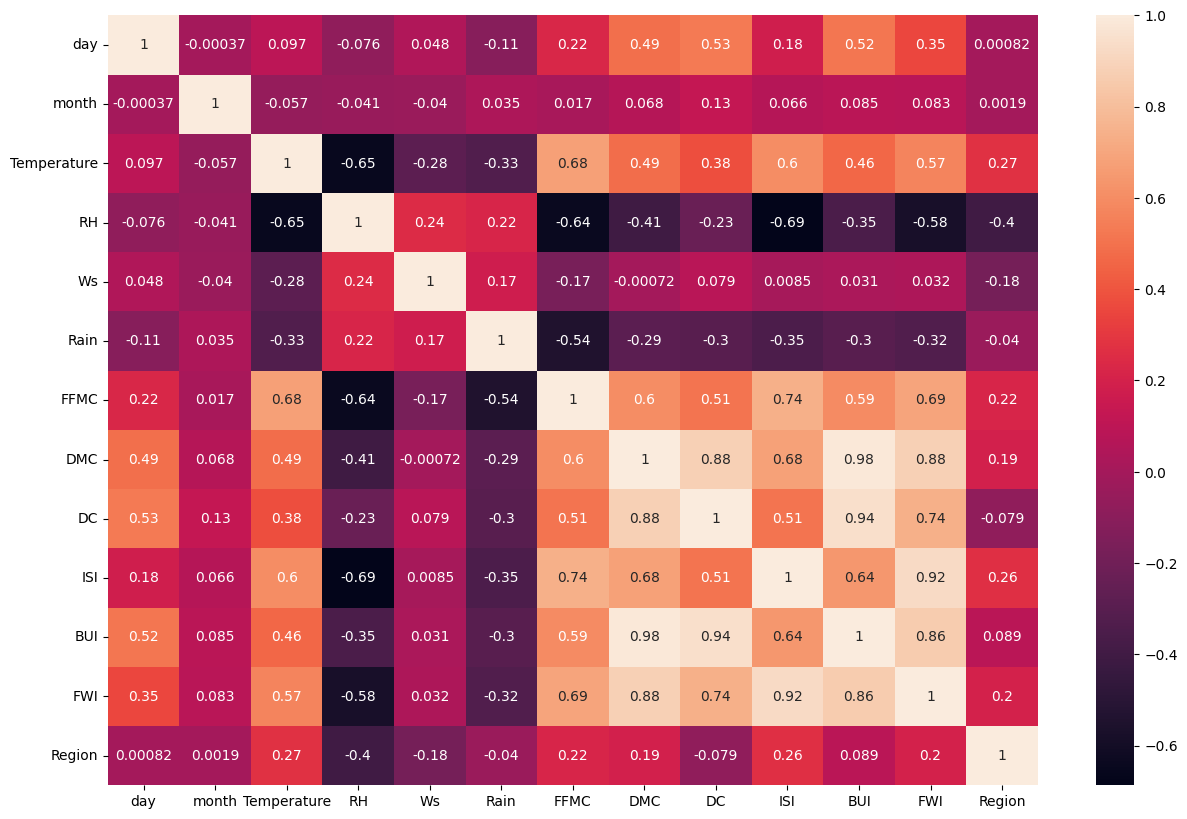

In [49]:
corr_matrix = df.corr() # To show the correlation between the columns of the dataset

plt.figure (figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [50]:
df= df.drop(['DMC'], axis=1)  #Dropping "DMC" and "DC" column because the are 0.98 and 0.94 colinear with "BUI" respectively.
df= df.drop(['DC'], axis=1)

In [51]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,1.3,3.4,0.5,0
1,2,6,29,61,13,1.3,64.4,1.0,3.9,0.4,0
2,3,6,26,82,22,13.1,47.1,0.3,2.7,0.1,0
3,4,6,25,89,13,2.5,28.6,0.0,1.7,0.0,0
4,5,6,27,77,16,0.0,64.8,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,30,65,14,0.0,85.4,4.5,16.9,6.5,1
239,27,9,28,87,15,4.4,41.1,0.1,6.2,0.0,1
240,28,9,27,87,29,0.5,45.9,0.4,3.4,0.2,1
241,29,9,24,54,18,0.1,79.7,1.7,5.1,0.7,1


Visualization

array([[<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>,
        <Axes: title={'center': 'Rain'}>],
       [<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'ISI'}>, <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Region'}>, <Axes: >]], dtype=object)

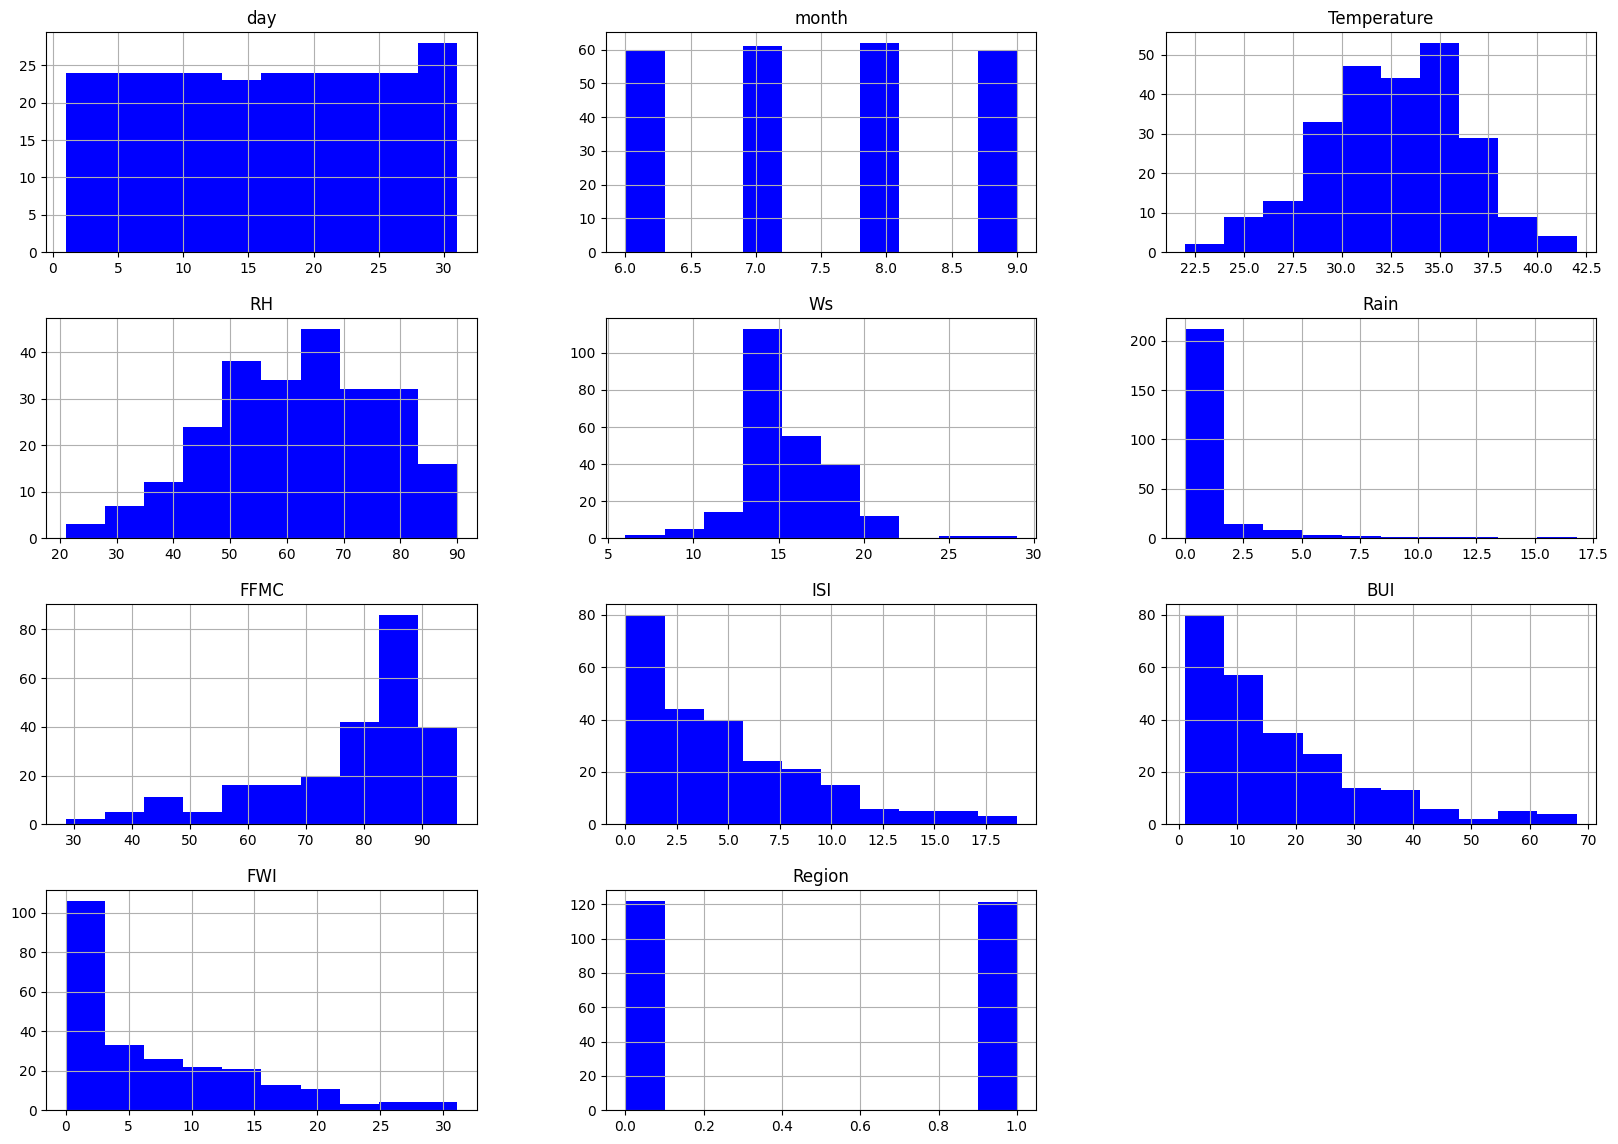

In [52]:
df.hist(figsize=(20,14),color='b') # Histogram

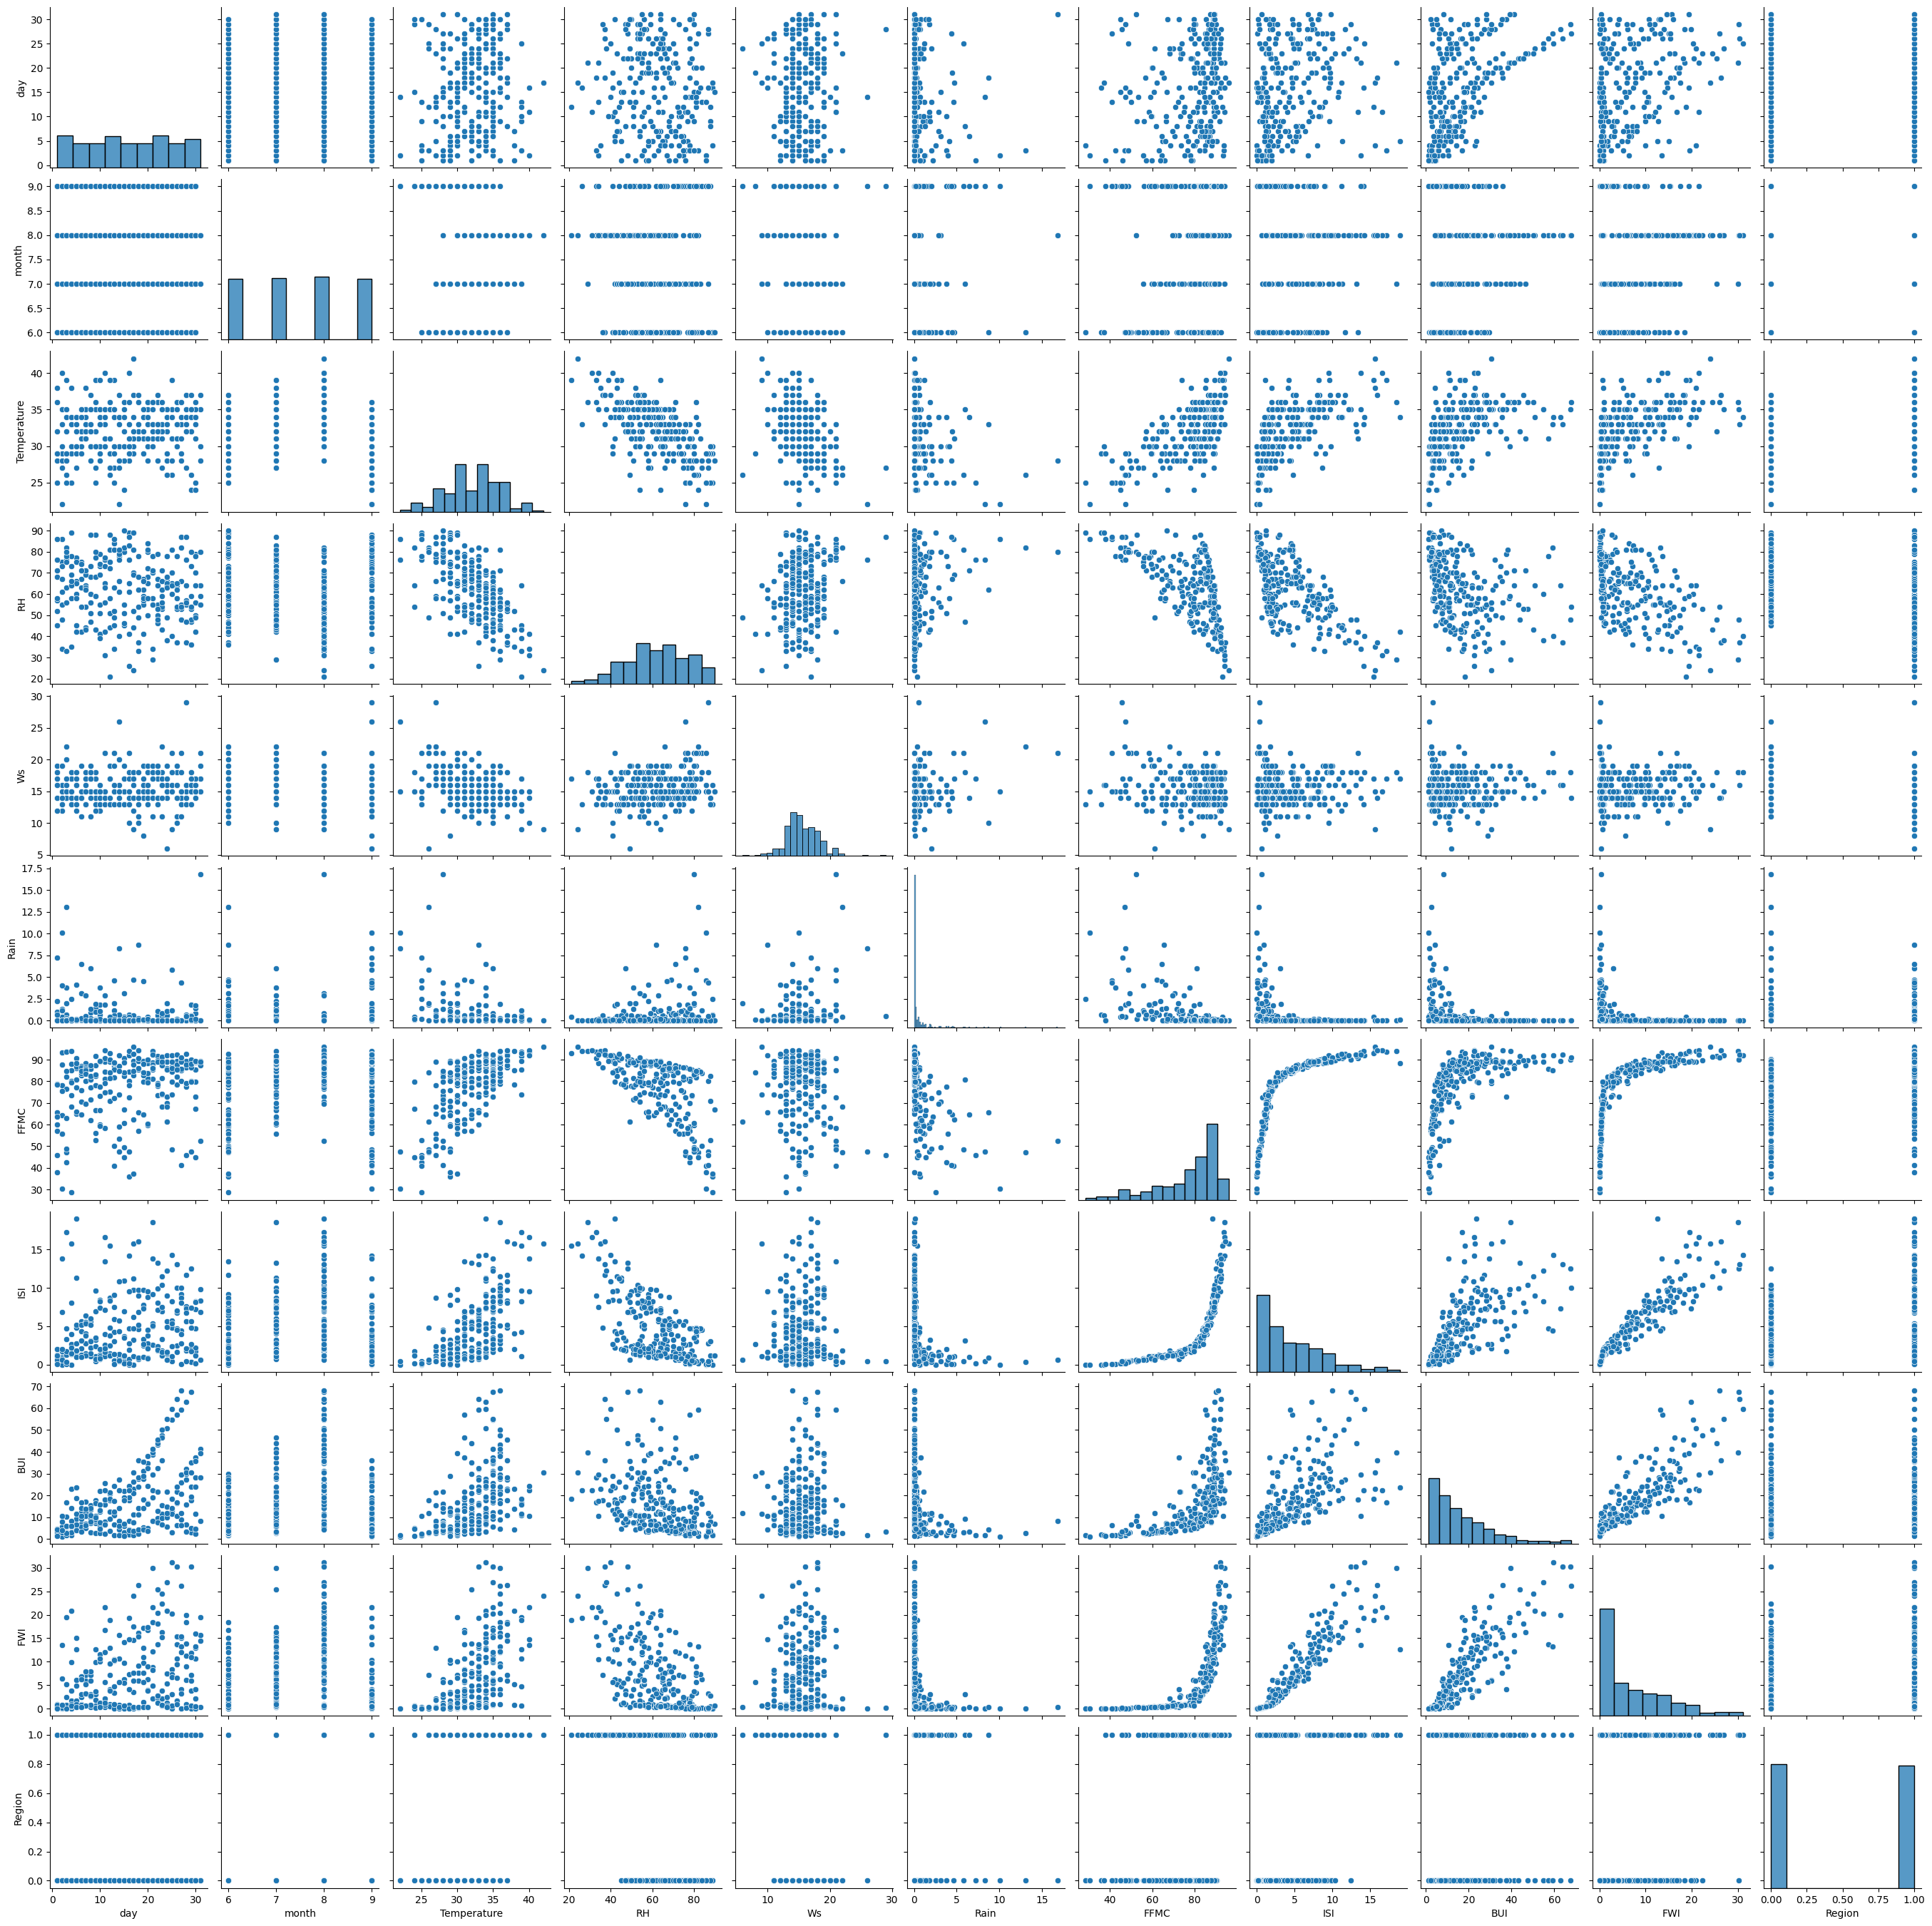

In [53]:
sns.pairplot(df) # Pair plot to understand the relation of each column with each column

<Axes: xlabel='Temperature', ylabel='day'>

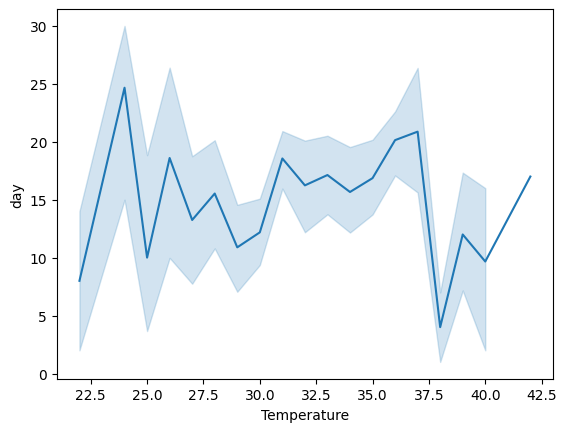

In [54]:
sns.lineplot(x='Temperature',y='day',data=df) # Line plot to understand the relation between temperature and day

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# df1 = df.copy()   # Creating a copy so that the original data is untouched.
# df1 = scaler.fit_transform(df1)

In [56]:
from sklearn.model_selection import train_test_split
y=df['FWI'] #Selecting the dependent variable

X=df.drop(['FWI'], axis=1,) #Selecting the indipendent variables

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=42) #divide our data from X and y data frames into test and train categories for both dependent and indipendendt variable , keeping the size of test dataset as 20 %
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 10), (49, 10), (194,), (49,))

In [57]:
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

Model building


Multi linear regression

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [59]:
lin_reg=LinearRegression()
lin_reg.fit(X_train_sc, y_train)

LinearRegression()

In [60]:
lin_reg.coef_ #Coefficients of best fit line

array([ 6.25665888e-02,  4.57180962e-04, -7.54288880e-02, -1.24997919e-01,
       -1.32338875e-01,  5.38707343e-02, -7.36336357e-01,  5.32577620e+00,
        3.71322670e+00, -7.10425788e-02])

In [61]:
lin_reg.intercept_ #Intercept of best fit line

7.420103092783506

In [62]:
y_pred=lin_reg.predict(X_test_sc) #Predict on test data
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


print(f'R2 Score: {r2_score(y_test, y_pred)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')

print(f'MSE: {mean_squared_error(y_test, y_pred)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R2 Score: 0.9870371789027653
MAE: 0.45190196313751513
MSE: 0.3928826455280046
RMSE: 0.6268035142913644


Polynomial regression

In [63]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,include_bias= False)
X_train_poly = poly.fit_transform(X_train_sc)
X_test_poly = poly.transform(X_test_sc)

In [64]:
lin_reg.fit(X_train_poly, y_train)

LinearRegression()

In [65]:
# Predict on the test set
y_pred_poly = lin_reg.predict(X_test_poly)

In [66]:
print(f'R2 Score: {r2_score(y_test, y_pred_poly)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_poly)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_poly)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly))}')

R2 Score: 0.9925820105784351
MAE: 0.3057397647779815
MSE: 0.224827550004904
RMSE: 0.4741598359255073


Descision tree using hyperparameter tuning

In [67]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the decision tree regressor
tree_reg = DecisionTreeRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'criterion': ['friedman_mse','poisson','squared_error','absolute_error']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='r2')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_
print("Best Model:", best_model)
# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
print('R^2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


Best Hyperparameters: {'criterion': 'squared_error', 'max_depth': 5}
Best Model: DecisionTreeRegressor(max_depth=5)
R^2: 0.9523439964920882
MAE: 0.9007577274941806
MSE: 1.444378240896528
RMSE: 1.2018228824983022


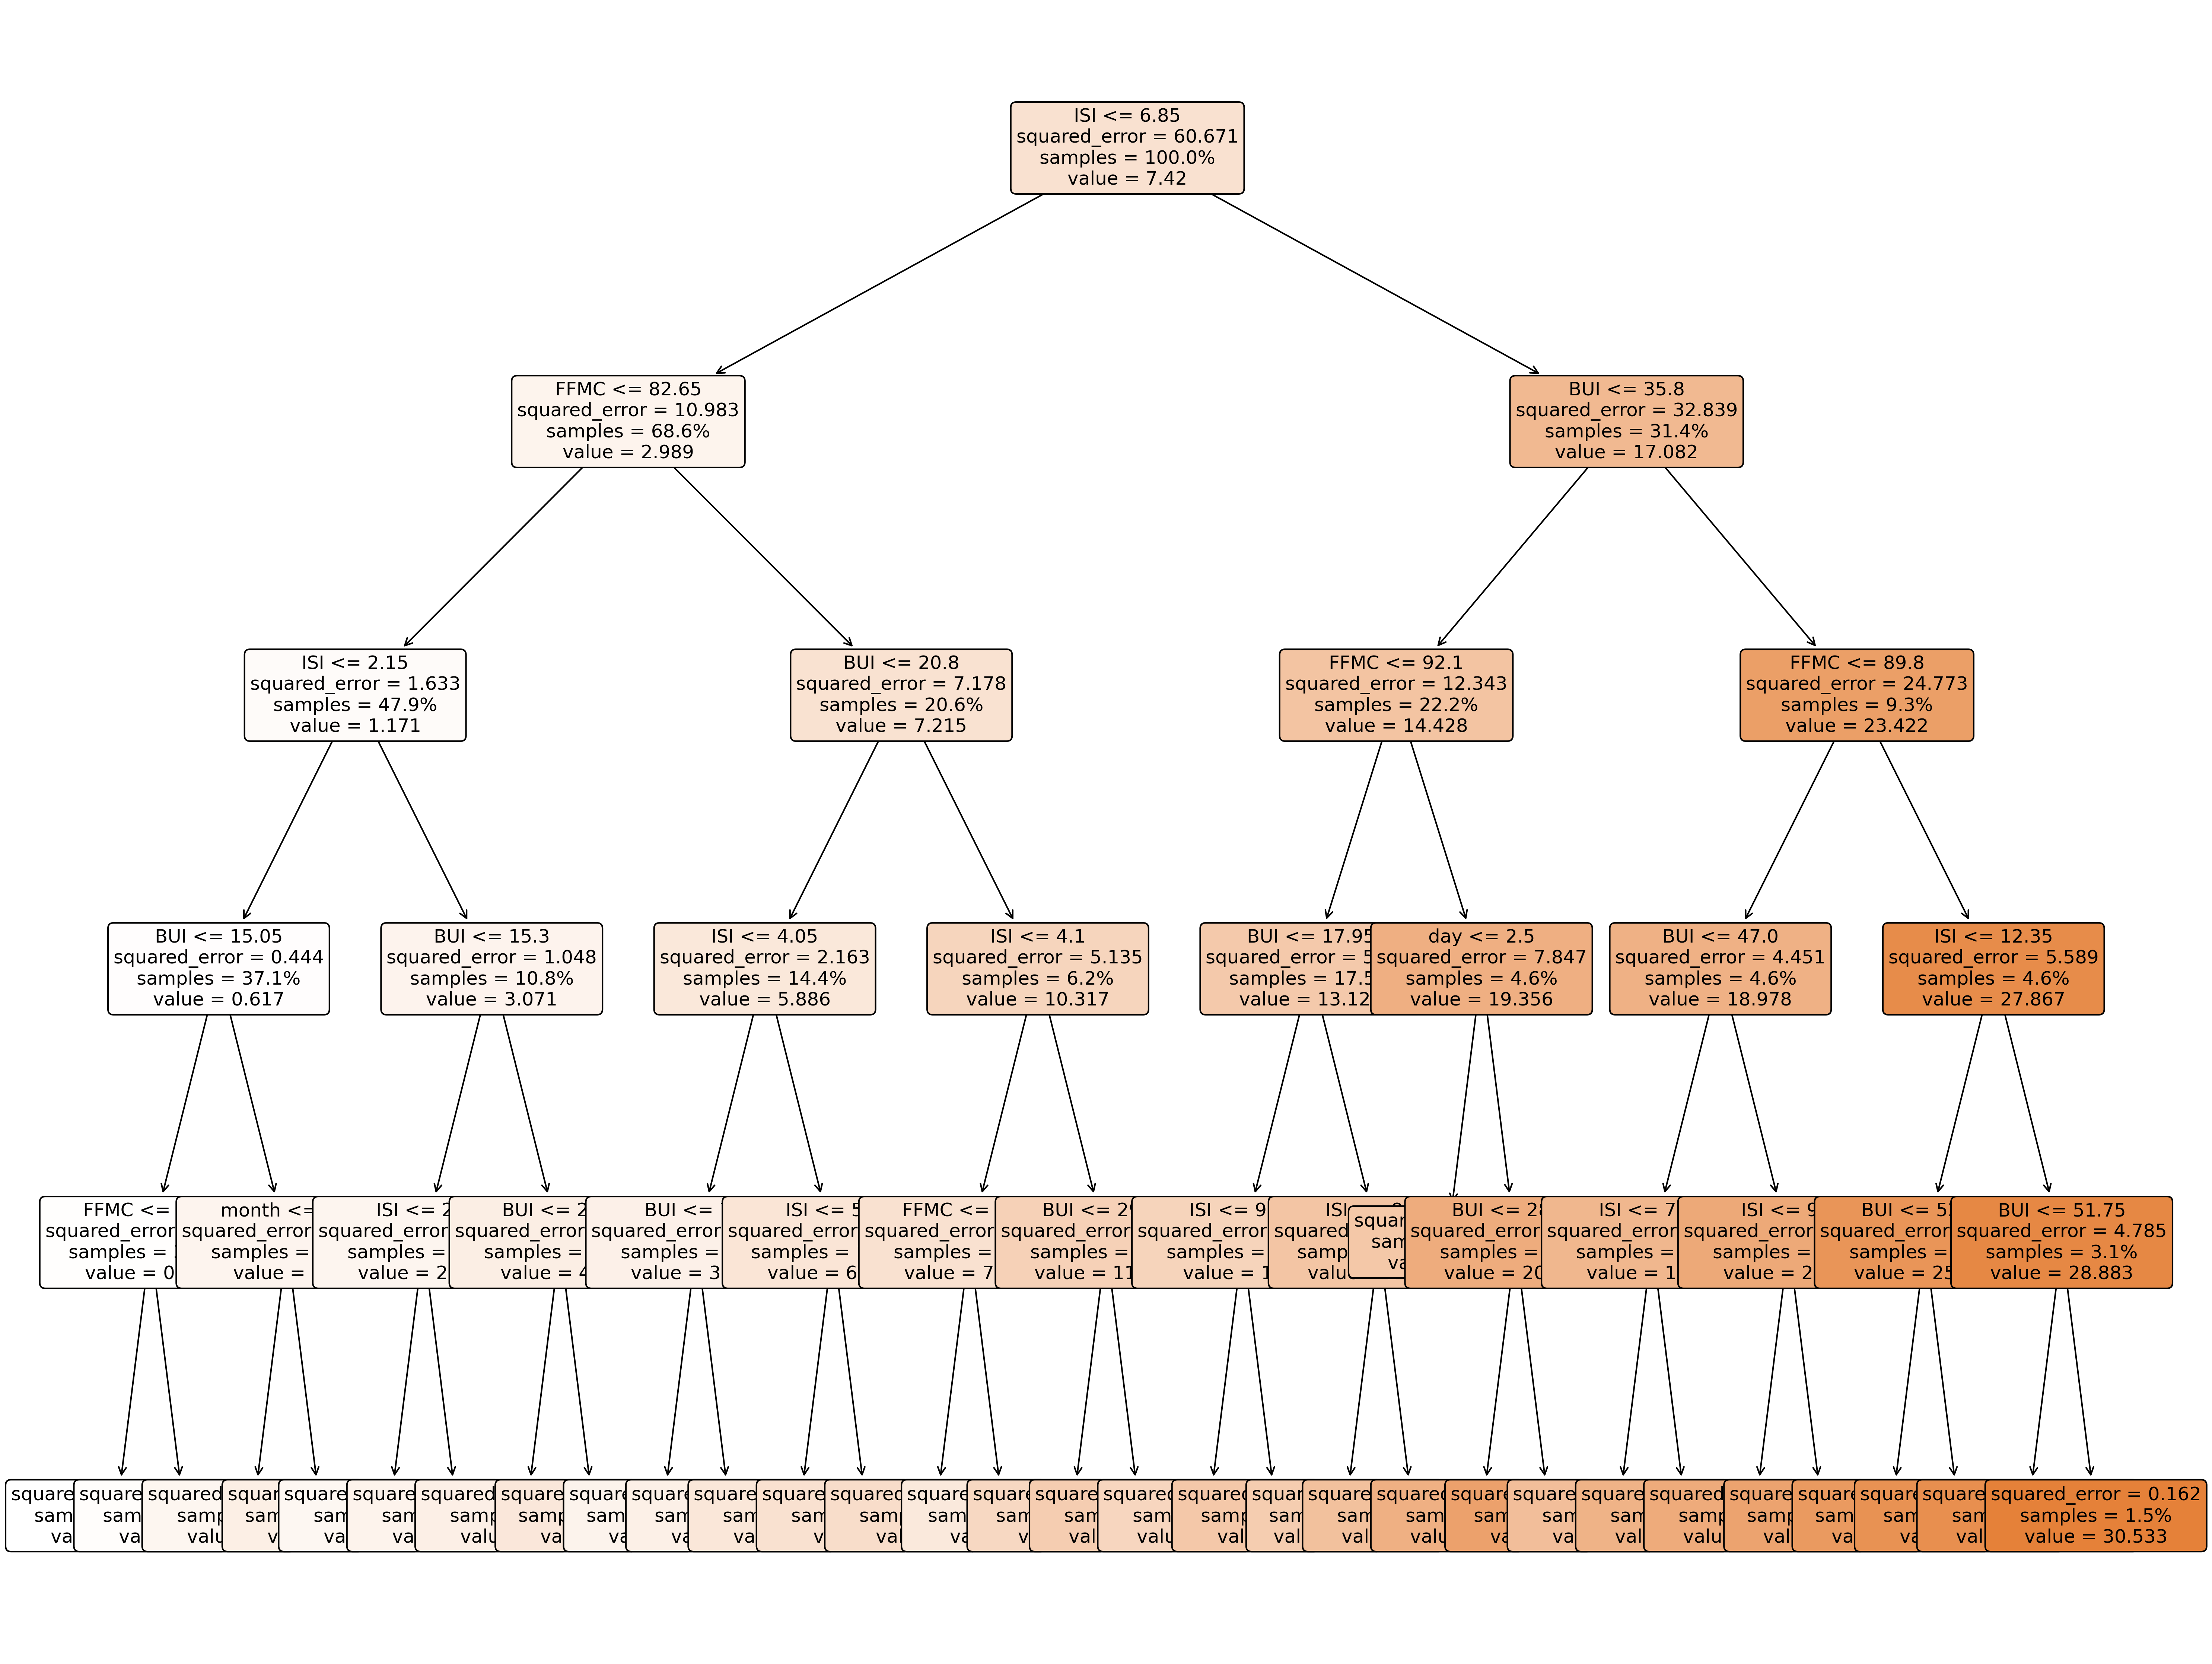

In [68]:
plt.figure(figsize=(20,15), dpi=300)  # Increase the figure size and DPI
tree.plot_tree(
    best_model,
    filled=True,
    feature_names=X.columns,
    rounded=True,  # Rounded nodes for better aesthetics
    fontsize=12,  # Adjust font size for readability
    impurity=True,  # Show impurity in the nodes
    proportion=True  # Show proportion of samples in the nodes
)
plt.tight_layout()  # Adjust layout
plt.show()

Elastic net

In [69]:
from sklearn.linear_model import  ElasticNet
en=ElasticNet(alpha=0.09, l1_ratio=0.5)

en.fit(X_train, y_train)

y_pred_en= en.predict(X_test)

print(f'R2 Score: {r2_score(y_test, y_pred_en)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_en)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_en)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_en))}')

R2 Score: 0.9874117776745523
MAE: 0.4458493583958863
MSE: 0.38152914806265564
RMSE: 0.6176804578927972
